In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df_deli=pd.read_csv(r'C:\Users\bisha\Desktop\deliveries.csv')
df_match=pd.read_csv(r'C:\Users\bisha\Desktop\matches.csv')

In [4]:
df_deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df_deli.shape

(179078, 21)

In [6]:
df_deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
df_deli.isnull()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [8]:
df_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
df_match.shape

(756, 18)

C:\Users\bisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


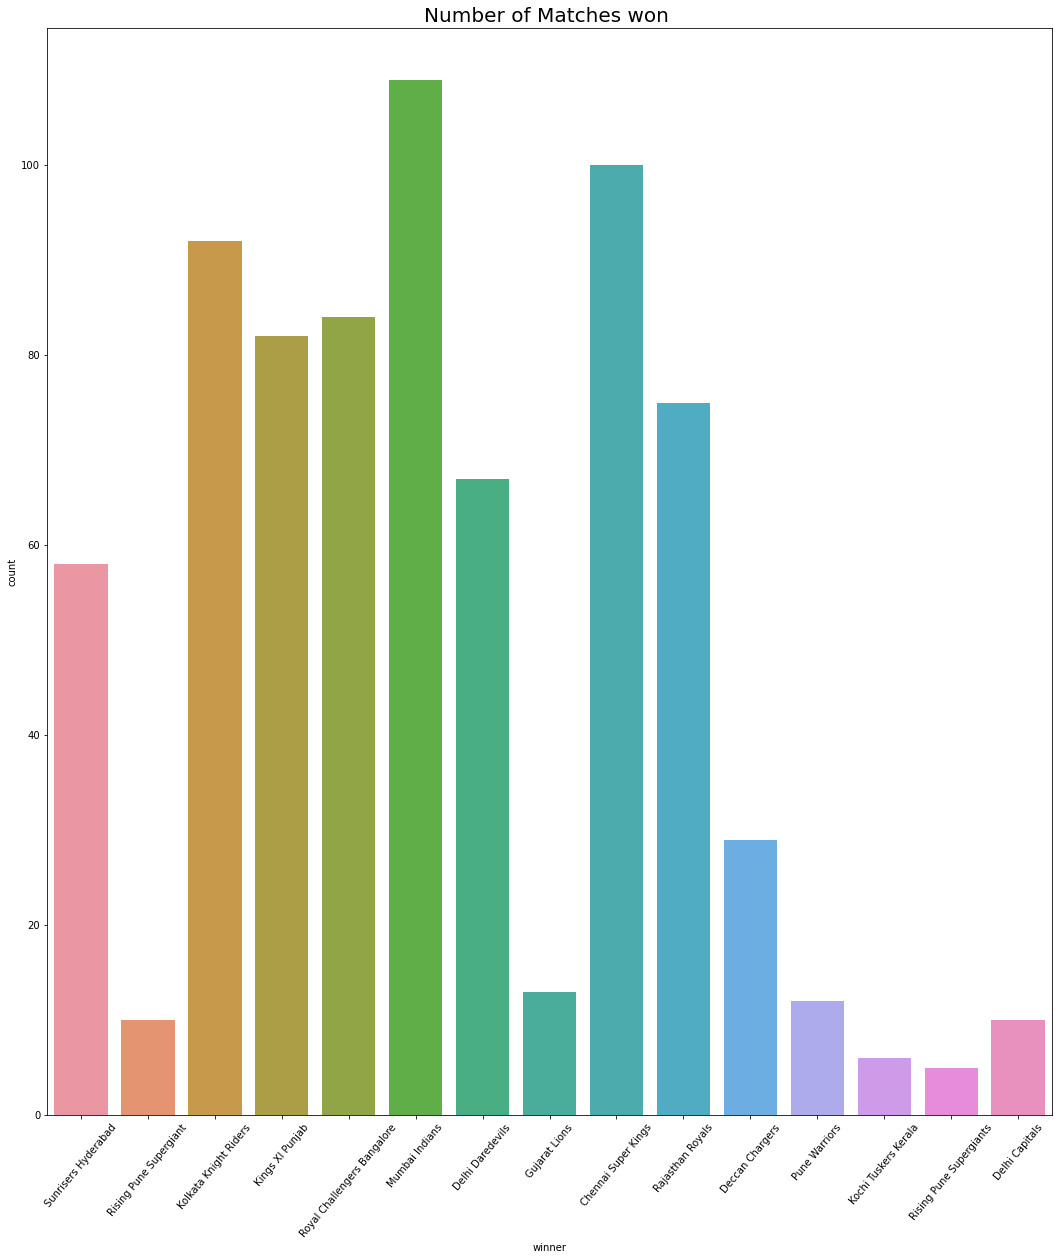

In [10]:
plt.figure(figsize=(18,20))
plt.xticks(rotation=50)
sns.countplot('winner',data=df_match)
plt.title("Number of Matches won ", fontsize=20)
plt.show()

In [44]:
# Picking the top 10 players based on the no. of Man of Match (MOM) awards won
mom=df_match['player_of_match'].value_counts()[:10]
mom

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

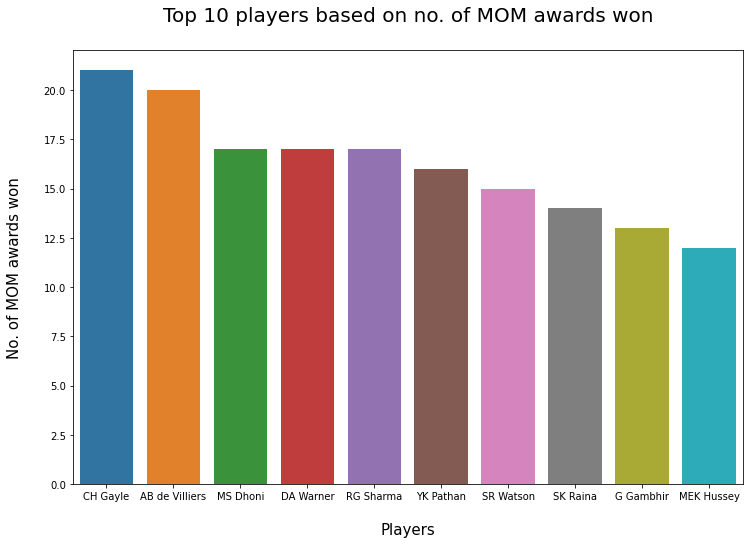

In [53]:
# Plot to visualise the top 10 players based on the no. of MOM awards won
plt.figure(figsize=(12,8))
ax.set_ylim([0,28])
plt.title('Top 10 players based on no. of MOM awards won\n',fontsize=20)
sns.barplot(x=mom.index, y=mom, orient='v')
plt.ylabel('No. of MOM awards won\n',fontsize=15)
plt.xlabel('\nPlayers',fontsize=15)
plt.show()

In [23]:
df_match['dl_applied'].unique()


array([0, 1], dtype=int64)

In [25]:
# Matches where D/L method was and wasn't applied
# 0 indicates normal match with no D/L method applied and 1 indicates a rain curtailed match with D/L method being applied
df_match['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [27]:
# % of matches with and without D/L method (0 for no D/L and 1 for D/L method applied)
round(df_match['dl_applied'].value_counts()/df_match['dl_applied'].count()*100, 2)

0    97.49
1     2.51
Name: dl_applied, dtype: float64

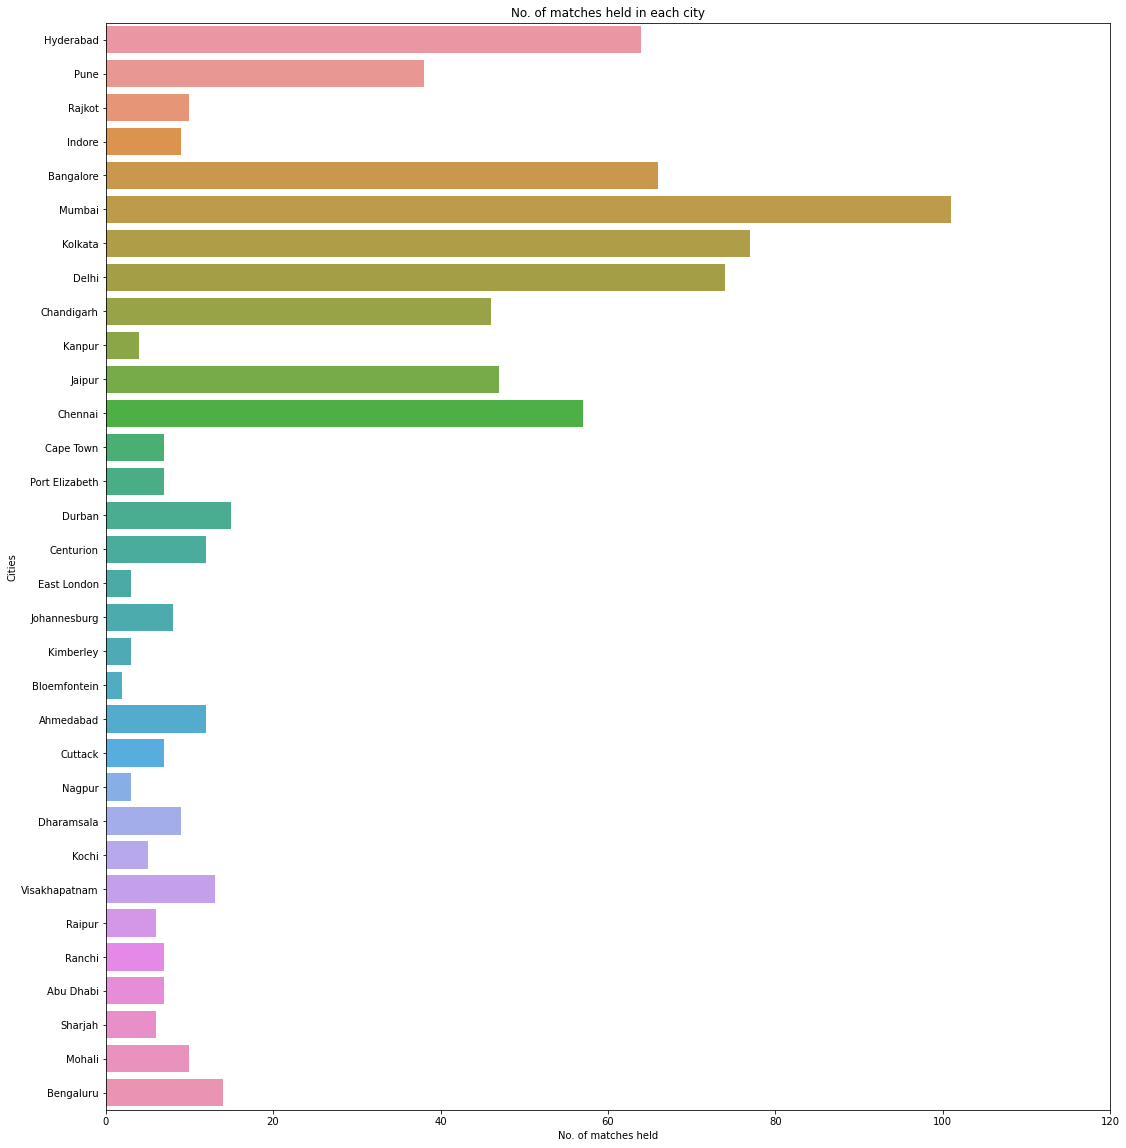

In [36]:
# Plot to visualise the no. of matches held in each city
plt.figure(figsize=(18,20))
sns.countplot(y='city', data=df_match)
plt.title('No. of matches held in each city')
plt.xlabel('No. of matches held')
plt.ylabel('Cities')
plt.xlim([0,120])
plt.show()

In [37]:
# No. of matches won by each team
df_match['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

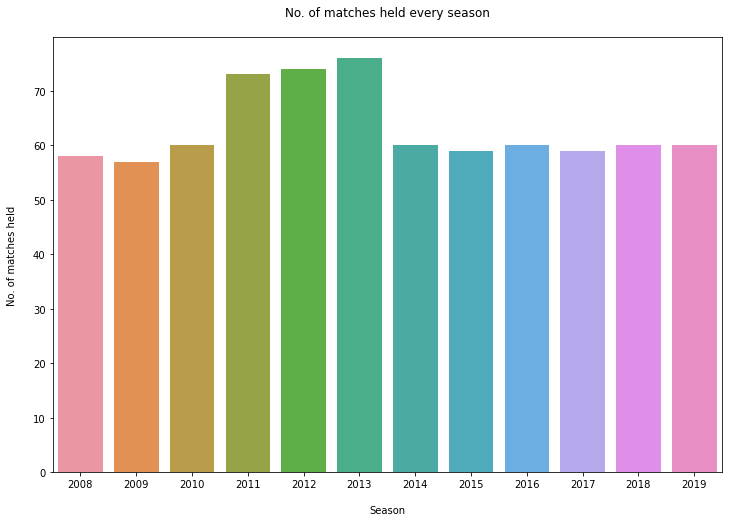

In [42]:
# Plot to visualise the no. of matches held every season
plt.figure(figsize=(12,8))
sns.countplot(x='season', data=df_match)
plt.title('No. of matches held every season\n')
plt.xlabel('\nSeason')
plt.ylabel('No. of matches held\n')
plt.show()

In [43]:
# Number of matches played in each seasons
df_match['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [55]:
# Does winning the toss mean winning the match?
winnerwinner=df_match['toss_winner']== df_match['winner']
winnerwinner.groupby(winnerwinner).size()

False    363
True     393
dtype: int64

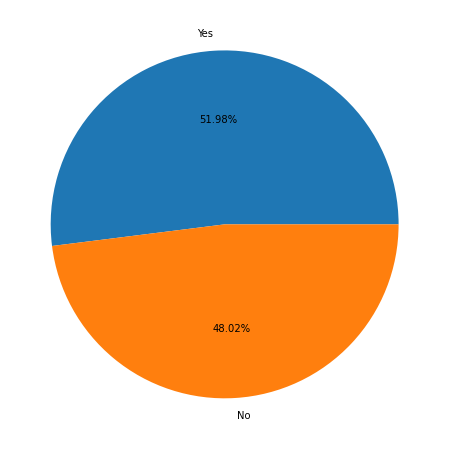

In [60]:
#--> Probability that the toss winner will win the match
plt.figure(figsize=(12,8))
z=df_match[df_match['toss_winner']==df_match['winner']]
slices=[len(z),(len(df_match)-len(z))]
labels=['Yes','No']
plt.pie(slices,labels=labels,autopct='%1.2f%%')
fig = plt.gcf()
plt.show()

In [61]:
# How many times did the captain choose fielding and batting after winning the toss
df_match['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

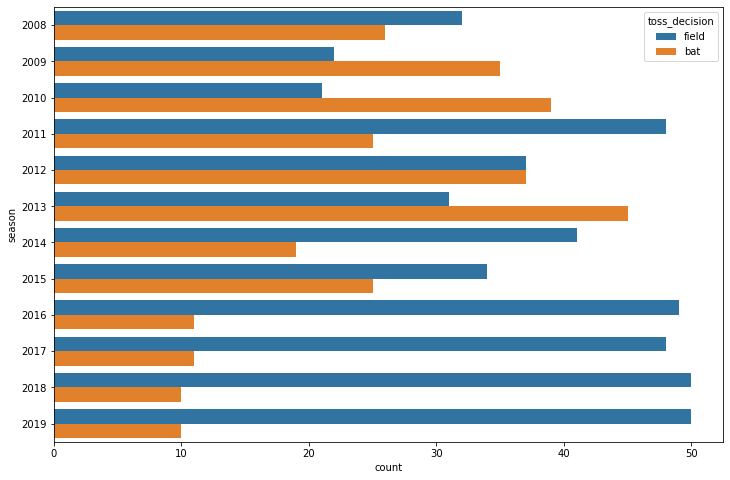

In [64]:
# The graph will show the decision of fielding or batting if a team wins the toss. 
plt.figure(figsize=(12,8))
sns.countplot(y='season',hue='toss_decision',data=df_match)
plt.show()

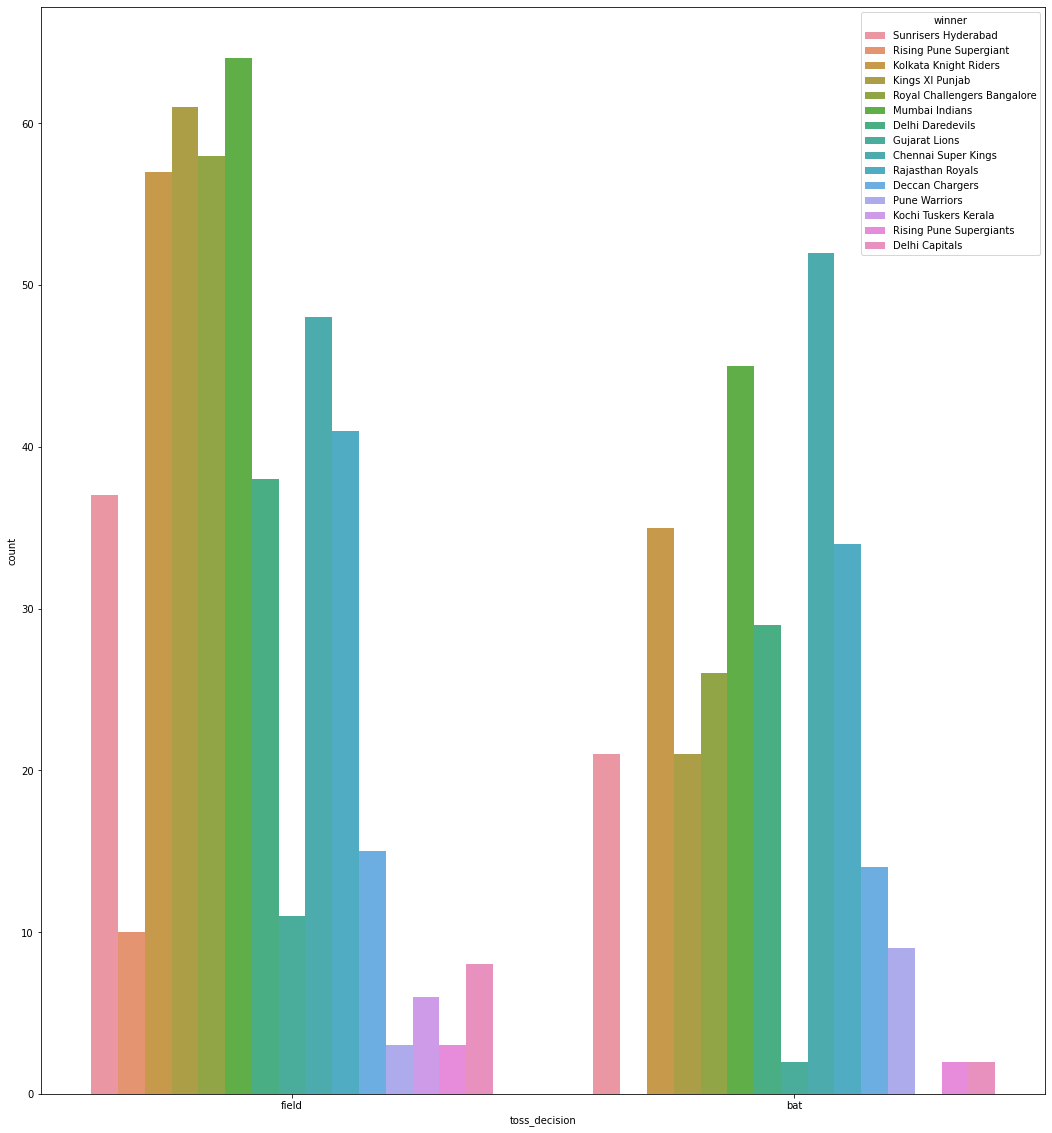

In [70]:
plt.figure(figsize=(18,20))
sns.countplot(x="toss_decision",hue='winner',data=df_match)
plt.show()

In [73]:
df_match[['toss_decision','winner']].value_counts()

toss_decision  winner                     
field          Mumbai Indians                 64
               Kings XI Punjab                61
               Royal Challengers Bangalore    58
               Kolkata Knight Riders          57
bat            Chennai Super Kings            52
field          Chennai Super Kings            48
bat            Mumbai Indians                 45
field          Rajasthan Royals               41
               Delhi Daredevils               38
               Sunrisers Hyderabad            37
bat            Kolkata Knight Riders          35
               Rajasthan Royals               34
               Delhi Daredevils               29
               Royal Challengers Bangalore    26
               Sunrisers Hyderabad            21
               Kings XI Punjab                21
field          Deccan Chargers                15
bat            Deccan Chargers                14
field          Gujarat Lions                  11
               Rising Pune

In [74]:
# Stadiums which have hosted D/L method applied matches 
df_match.query('dl_applied==1')['venue']

56                                 M Chinnaswamy Stadium
99                                      Feroz Shah Kotla
102                                         Eden Gardens
119                                             Newlands
122                                            Kingsmead
148                                      SuperSport Park
251                                        Nehru Stadium
280                                         Eden Gardens
290                                M Chinnaswamy Stadium
488                                     Feroz Shah Kotla
536    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
567            Rajiv Gandhi International Stadium, Uppal
597            Rajiv Gandhi International Stadium, Uppal
620                                         Eden Gardens
624    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
625                                M Chinnaswamy Stadium
641                               Sawai Mansingh Stadium
653                            

In [76]:
# Cities which have witnessed D/L method applied matches
df_match.query('dl_applied==1')['city']

56         Bangalore
99             Delhi
102          Kolkata
119        Cape Town
122           Durban
148        Centurion
251            Kochi
280          Kolkata
290        Bangalore
488            Delhi
536    Visakhapatnam
567        Hyderabad
597        Hyderabad
620          Kolkata
624    Visakhapatnam
625        Bangalore
641           Jaipur
653          Kolkata
667            Delhi
Name: city, dtype: object

In [77]:
# Seasons with D/L method applied matches
year=df_match.query('dl_applied==1')['season']
year

56     2017
99     2008
102    2008
119    2009
122    2009
148    2009
251    2011
280    2011
290    2011
488    2014
536    2015
567    2015
597    2016
620    2016
624    2016
625    2016
641    2018
653    2018
667    2018
Name: season, dtype: int64

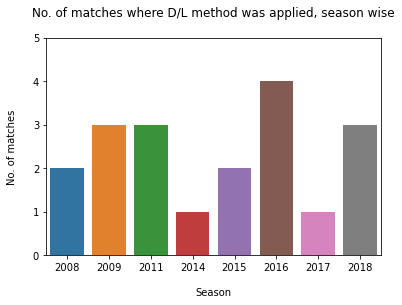

In [80]:
# Plot to visualise the no. of matches where D/L method was applied season wise
fig, ax=plt.subplots()
ax.set_ylim([0,5])
ax.set_title('No. of matches where D/L method was applied, season wise\n')
sns.countplot(x=year, data=df_match)
plt.xlabel('\nSeason')
plt.ylabel('No. of matches\n')
plt.show()

In [82]:
# Different results for games
df_match['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [83]:
#How many times did the team won the Toss
df_match['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

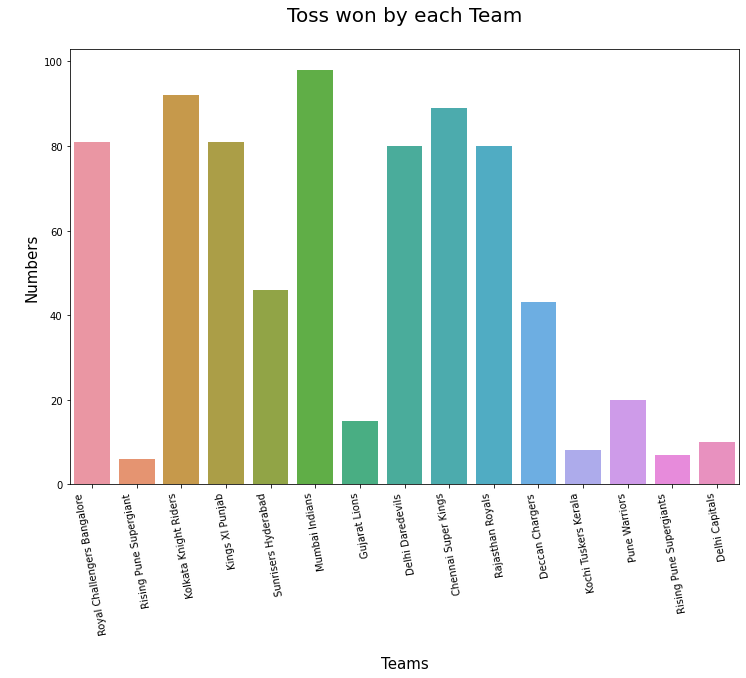

In [89]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=100)
sns.countplot(x='toss_winner',data=df_match)
plt.title("Toss won by each Team\n",fontsize=20)
plt.xlabel('\nTeams',fontsize=15)
plt.ylabel('\nNumbers',fontsize=15)
plt.show()

In [90]:
# Best venue for defending your total
df_match.venue[df_match.win_by_runs!=0].mode()

0    Wankhede Stadium
dtype: object

In [91]:
# Best venue to chase a total
df_match.venue[df_match.win_by_wickets!=0].mode()

0    Eden Gardens
dtype: object

In [92]:
# Best defending team
df_match.winner[df_match.win_by_runs!=0].mode()

0    Mumbai Indians
dtype: object

In [93]:
# Best chasing team
df_match.winner[df_match.win_by_wickets!=0].mode()

0    Kolkata Knight Riders
dtype: object

In [95]:
max(df_match['win_by_runs'])

146

In [96]:
# Match won by the maximum margin of runs
df_match.iloc[df_match['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [99]:
max(df_match["win_by_wickets"])

10

In [100]:
# Match won by the maximum margin of wickets
df_match.iloc[df_match['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [103]:
# Match won by minimum margin of runs
df_match.iloc[df_match[df_match['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [102]:
# Match won by minimum wickets (not by 0 wickets)
df_match.iloc[df_match[df_match['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

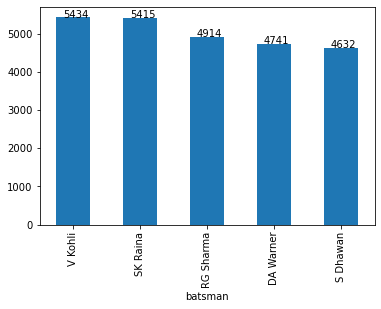

In [127]:
# Highest run scoring batsman (Top 5)
max_runs=df_deli.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:5].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.show()

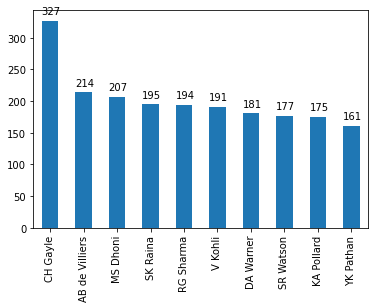

In [130]:
#Player that has scored the most number of sixes
ax=df_deli[df_deli['batsman_runs']==6].batsman.value_counts()[:10].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
plt.show()

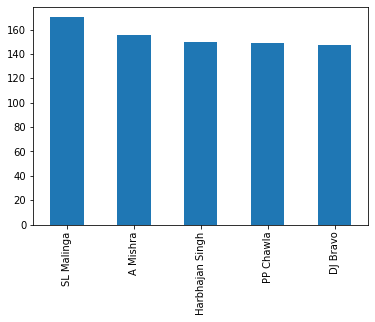

In [146]:
# Top 5 bowlers with most number of wickets
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"] 
yo=df_deli[df_deli["dismissal_kind"].isin(dismissal_kinds)]
zz=yo['bowler'].value_counts()[:5].plot.bar()
for p in zz.patches:
    zz
plt.show()

In [140]:
# Orange cap winner each year with their total runs
orange=df_match[['id','season']]
orange=orange.merge(df_deli,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"])
orange.sort_values(by='season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


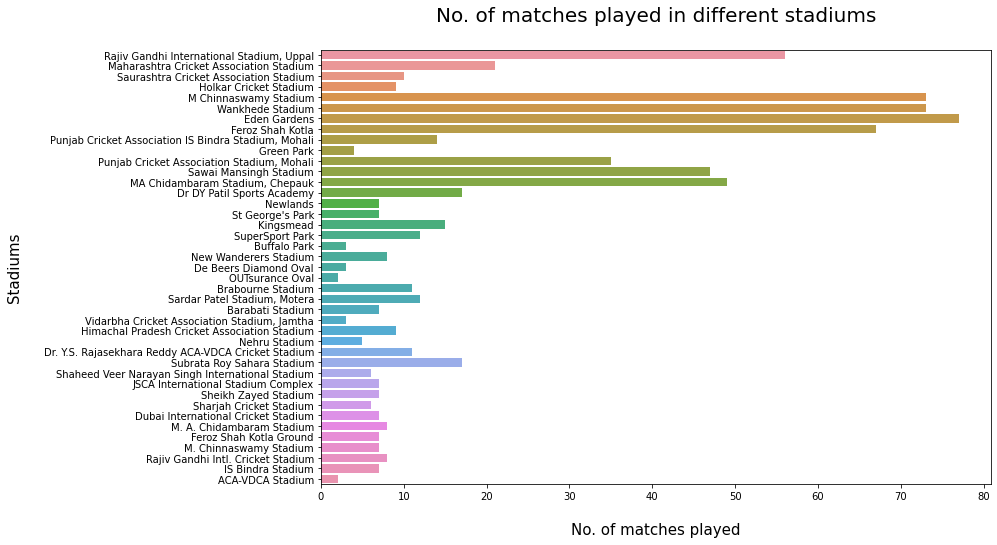

In [144]:
# No. of matches played in different stadiums
plt.figure(figsize=(12,8))
sns.countplot(y='venue', data=df_match)
plt.title('No. of matches played in different stadiums\n',fontsize=20)
plt.xlabel('\nNo. of matches played',fontsize=15)
plt.ylabel('Stadiums\n',fontsize=15)
plt.show()

## Conclusion and Results
* Most successful team :- Mumbai Indians
* Most successful player :- Virat Kohli
* Most successful bowler :- SL Malinga
* Player with maximum sixes :- CH Gayle
* Toss play an important role in winning the matches team winning the toss and choosing to field had high probablity of winning the match.
* Eden Garden stadium is best for chasing the total
* Wankhede stadium is best for defending the total.